# IMPORT LIBRARIES

In [45]:
# Data manupulation:
import pandas as pd
import numpy as np

# Data visualisation:
import matplotlib.pyplot as plt

# Dataset:
from tensorflow.keras.datasets import mnist

#ML Model:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, GaussianNoise
from tensorflow.keras.optimizers import SGD
import tensorflow as tf

In [22]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

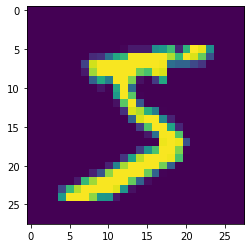

In [23]:
plt.imshow(X_train[0])

In [24]:
# SCALE THE DATA:
X_train = X_train/255
X_test = X_test/255

### ENCODER

In [29]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

### DECODER

In [30]:
decoder = Sequential()
decoder.add(Dense(50, input_shape =[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

### AUTOENCODER

In [31]:
autoencoder =  Sequential([encoder, decoder])

In [32]:
autoencoder.compile(loss='binary_crossentropy',
                    optimizer=SGD(lr=1.5),
                   metrics = ['accuracy'])

In [34]:
autoencoder.fit(X_train, X_train,epochs=5, 
                validation_data=(X_test, X_test))

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1962 - accuracy: 0.1486 - val_loss: 0.1743 - val_accuracy: 0.1729
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1638 - accuracy: 0.1904 - val_loss: 0.1531 - val_accuracy: 0.2052
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1486 - accuracy: 0.2137 - val_loss: 0.1422 - val_accuracy: 0.2207
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1423 - accuracy: 0.2245 - val_loss: 0.1380 - val_accuracy: 0.2307
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1381 - accuracy: 0.2305 - val_loss: 0.1351 - val_accuracy: 0.2261


In [35]:
passed_images = autoencoder.predict(X_test[:10])

Original Image


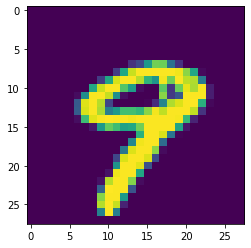

Attemted Recontruction (after autoencoder)


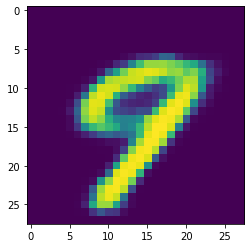

In [39]:
n = 9

print('Original Image')
plt.imshow(X_test[n])
plt.show()

print('Attemted Recontruction (after autoencoder)')
plt.imshow(passed_images[n])

### ADD NOISE

In [41]:
sample  = GaussianNoise(0.2)

In [43]:
noisey = sample(X_test[:10], training =True)

Original Image


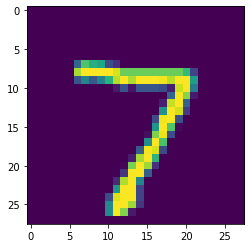

Noisey Version


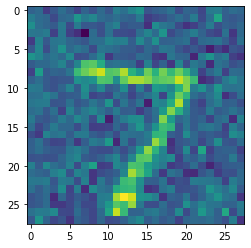

In [44]:
n = 0

print('Original Image')
plt.imshow(X_test[n])
plt.show()

print('Noisey Version')
plt.imshow(noisey[n])

### NOISE REMOVAL AUTOENCODER

In [47]:
tf.random.set_seed(101)
np.random.seed(101)


encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [48]:
decoder = Sequential()
decoder.add(Dense(50, input_shape =[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [49]:
noise_remover = Sequential([encoder, decoder])

In [50]:
noise_remover.compile(loss='binary_crossentropy',
                    optimizer=SGD(lr=1.5),
                   metrics = ['accuracy'])

In [51]:
noise_remover.fit(X_train, X_train,epochs=8, 
                validation_data=(X_test, X_test))

Epoch 1/8
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2927 - accuracy: 0.0704 - val_loss: 0.2173 - val_accuracy: 0.1228
Epoch 2/8
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2065 - accuracy: 0.1327 - val_loss: 0.1734 - val_accuracy: 0.1722
Epoch 3/8
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1672 - accuracy: 0.1853 - val_loss: 0.1547 - val_accuracy: 0.2086
Epoch 4/8
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1519 - accuracy: 0.2051 - val_loss: 0.1437 - val_accuracy: 0.2211
Epoch 5/8
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1433 - accuracy: 0.2177 - val_loss: 0.1353 - val_accuracy: 0.2236
Epoch 6/8
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1374 - accuracy: 0.2264 - val_loss: 0.1333 - val_accuracy: 0.2265
Epoch 7/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1333 - accuracy: 0.2305 - val_loss: 0.1287 - val_accuracy:

In [52]:
ten_noisey_images = sample(X_test[:10], training = True)

In [53]:
denoised = noise_remover(ten_noisey_images)

Original Image


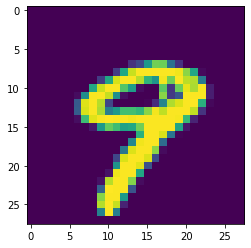

Noisey Version


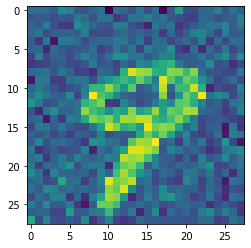

Denoised Version


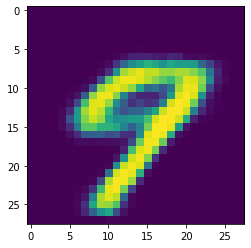

In [55]:
n=9

print('Original Image')
plt.imshow(X_test[n])
plt.show()

print('Noisey Version')
plt.imshow(noisey[n])
plt.show()

print('Denoised Version')
plt.imshow(denoised[n])
plt.show()